<a href="https://colab.research.google.com/github/Shailashree/Newgittest/blob/master/Salary_Vs_Number_of_Years_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive

In [6]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
# Loading the data
data = pd.read_csv('gdrive/MyDrive/Salary_dataset.csv')

In [8]:
## Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [12]:
data.sample(5)

,Unnamed: 0,YearsExperience,Salary
2,2,1.6,37732.0
23,23,8.3,113813.0
1,1,1.4,46206.0
26,26,9.6,116970.0
24,24,8.8,109432.0


In [13]:
data.shape

(30, 3)

In [15]:
data.drop('Unnamed: 0',axis=1, inplace= True)

In [16]:
data.head(5)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [19]:
data.isnull().sum()
# There are no null values

,0
YearsExperience,0
Salary,0


In [21]:
data.duplicated().sum()
 # There are no duplicates

0

In [25]:
## The .info() method helps you quickly check the structure of a DataFrame, including missing values and the type of data you're dealing with.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [26]:
data.describe(include='all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [27]:
data['YearsExperience'].value_counts()

,count
YearsExperience,
3.3,2
4.1,2
1.2,1
5.4,1
10.4,1
9.7,1
9.6,1
9.1,1
8.8,1


In [28]:
## Checking for unique values to decide if we need to drop any column

In [29]:
data.nunique()

,0
YearsExperience,28
Salary,30


In [30]:
## Visualizing the dataset

In [32]:
import plotly.express as px

fig = px.scatter(data_frame=data, x="YearsExperience", y="Salary",
                 size="YearsExperience", trendline='ols')
fig.show()

In [33]:
## We can see the the evident linear trend here. As the Years of Experience increases the salary also incereces.

<Axes: xlabel='YearsExperience', ylabel='Count'>

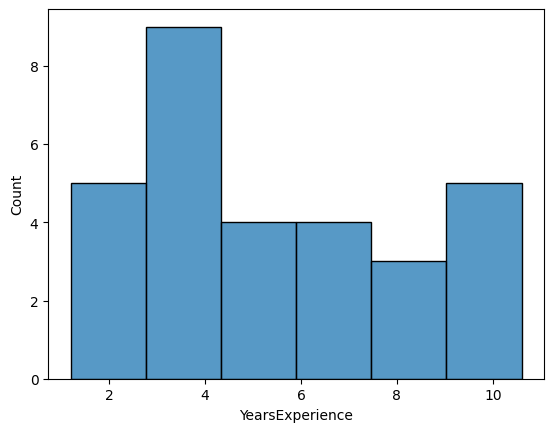

In [34]:
sns.histplot(data= data, x ='YearsExperience')

<Axes: xlabel='Salary', ylabel='Count'>

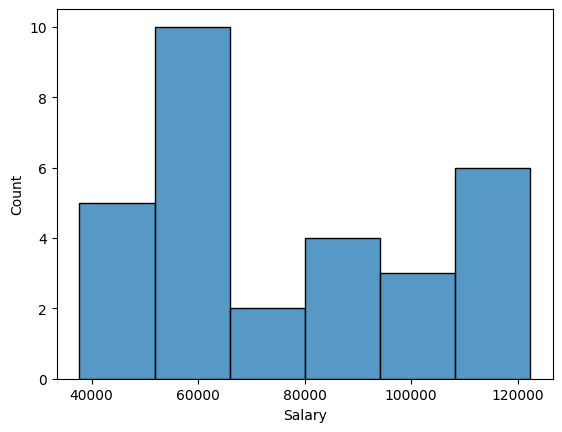

In [35]:
sns.histplot(data= data, x= 'Salary')

<Axes: >

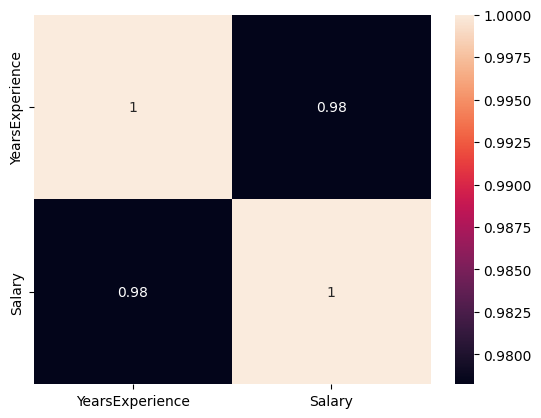

In [36]:
sns.heatmap(data.corr(),annot=True)

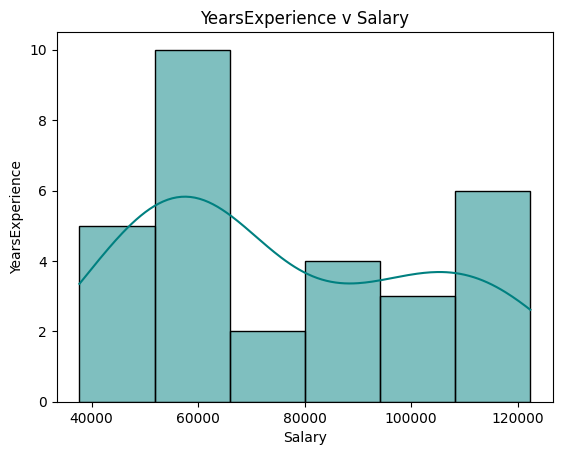

In [37]:
sns.histplot(data['Salary'], kde=True, color='teal')
plt.title('YearsExperience v Salary')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()

Text(0, 0.5, 'Salary')

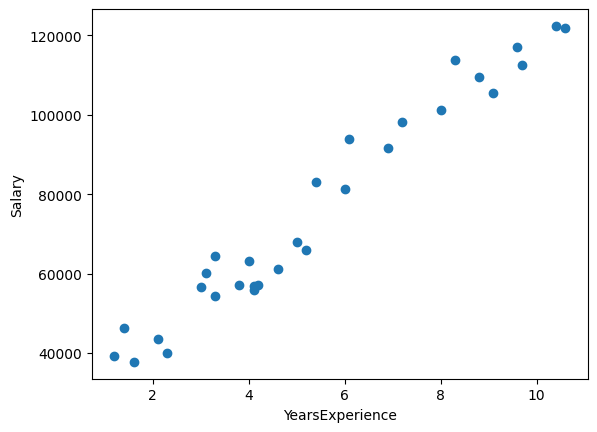

In [38]:
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [39]:
##Extracting features and target variable from the dataframe 'data'

In [41]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [42]:
## splitting the data into train and test data

In [44]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
## Fitting the model

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
## Making predictions on Train and Test data

In [48]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

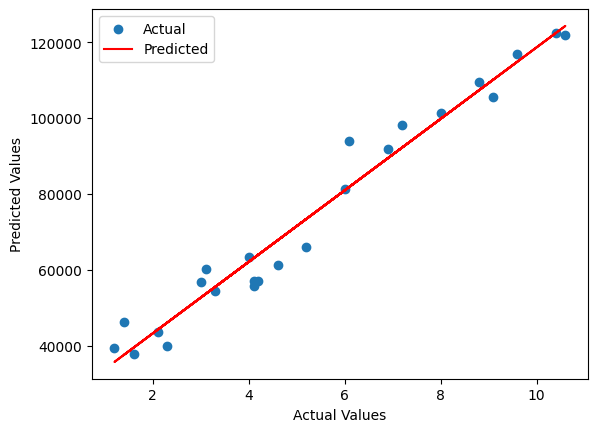

In [49]:
plt.scatter(X_train,y_train, label='Actual')
plt.plot(X_train,lr.predict(X_train),color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [50]:
## Determining the metrics for Linear Regression

In [52]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

train_rme= mean_squared_error(y_train, y_train_pred)
test_rme= mean_squared_error(y_test, y_test_pred)
train_r2= r2_score(y_train, y_train_pred)
test_r2= r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

#print(f'Mean Absolute Error: {mae}')


print(f"train_rme: {train_rme}\n"
      f"test_rme: {test_rme}\n"
      f"train_r2: {train_r2}\n"
      f"test_r2: {test_r2}\n"
      f"train_mae: {train_mae}\n"
      f"test_mae: {test_mae}\n")

train_rme: 27102249.73126133
test_rme: 49830096.855908394
train_r2: 0.9645401573418148
test_r2: 0.9024461774180497
train_mae: 4221.046734449735
test_mae: 6286.453830757745



In [53]:
## Create DataFrames for training and testing datasets

In [54]:
train_data = pd.DataFrame({'Actual': y_train.ravel(), 'Predicted': y_train_pred.ravel(), 'Dataset': 'Training'})
test_data = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_test_pred.ravel(), 'Dataset': 'Testing'})

# Concatenate both DataFrames
combined_data = pd.concat([train_data, test_data], ignore_index=True)

<ipython-input-54-94239b0eaabf>:1: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

<ipython-input-54-94239b0eaabf>:2: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



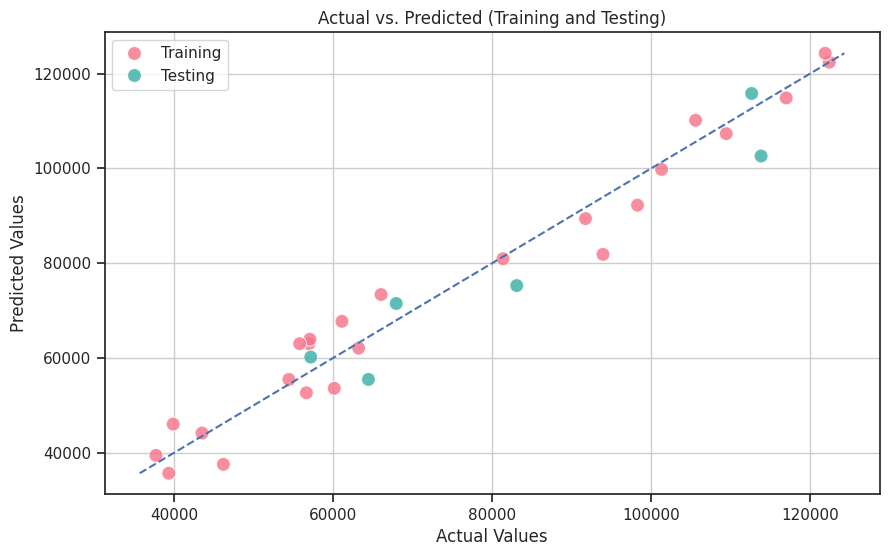

In [58]:
sns.set(style='ticks')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Dataset', data=combined_data, s=100, alpha=0.8, palette='husl')

plt.plot(
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
    'b--'
)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training and Testing)')

plt.legend()
plt.grid(True)
plt.show()


In [59]:
## Linear Regression Notes

In [61]:
## Linear regression is a statistical and machine learning technique used to model the relationship between a dependent variable (target) and one or more independent variables (predictors). It assumes a linear relationship between the variables, meaning the target variable can be expressed as a linear combination of the predictors.


# Key Concepts:

# 1.	Simple Linear Regression: Involves one independent variable and models the relationship as:

# y=b0+b1x+ϵy=b0+b1x+ϵ
# 	yy: Dependent variable
# 	xx: Independent variable
# 	b0b0: Intercept (value of yy when x=0x=0)
# 	b1b1: Slope (rate of change in yy for a unit change in xx)
# 	ϵϵ: Error term (captures variability not explained by the model)

# 2.	Multiple Linear Regression: Involves multiple independent variables:
#     y=b0+b1x1+b2x2+⋯+bnxn+ϵy=b0+b1x1+b2x2+⋯+bnxn+ϵ
# 	  x1,x2,…,xnx1,x2,…,xn: Independent variables
# 	  b1,b2,…,bnb1,b2,…,bn: Coefficients representing the effect of each predictor on yy

# Goals:
# •	Minimize the difference between predicted and actual values by finding the best-fit line (or hyperplane in higher dimensions).
# •	The most common method for finding the best-fit line is Ordinary Least Squares (OLS), which minimizes the sum of squared errors:SSE=∑i=1n(yi−y^i)2SSE=i=1∑n(yi−y^i)2 where yiyi is the actual value and y^iy^i is the predicted value.

# Assumptions:
# 1.	Linearity: The relationship between predictors and the target is linear.
# 2.	Independence: Observations are independent of each other.
# 3.	Homoscedasticity: Constant variance of errors.
# 4.	Normality: Errors are normally distributed.
# 5.	No multicollinearity (for multiple regression): Predictors are not highly correlated.

# Applications:
# •	Predicting house prices based on features like size, location, etc.
# •	Estimating sales revenue from advertising spend.
# •	Identifying relationships between variables in research settings.



In [ ]:
# Evaluation Metrics:
# •	R-squared (R2R2): Proportion of variance in the dependent variable explained by the independent variables.
# •	Mean Squared Error (MSE): Average of squared differences between actual and predicted values.
# •	Root Mean Squared Error (RMSE): Square root of MSE, useful for interpretability.


# 1. R2R2 (R-squared):
# •	R2R2 measures the proportion of variance in the dependent variable (yy) explained by the independent variables (xx).
# Ideal Range:
# •	R2R2 values range from 0 to 1:
# o	0: The model explains none of the variance in the target variable.
# o	1: The model explains all the variance (perfect fit).
# Key Considerations:
# •	A higher R2R2 indicates better explanatory power, but:
# o	High R2R2: May indicate overfitting if the model is too complex for the data.
# o	Low R2R2: May still be acceptable in cases with high variability (e.g., human behavior, financial markets).
# •	For most practical applications, 0.7 to 0.9 is considered good, but this depends on the domain:
# o	Physical sciences: Higher R2R2 (close to 1) is expected.
# o	Social sciences or business: Lower R2R2 (e.g., 0.4 to 0.6) is more common due to high variability.

# 2. Mean Squared Error (MSE):
# •	MSE is the average of the squared differences between actual and predicted values.
# Ideal Range:
# •	A lower MSE indicates better performance.
# •	The ideal MSE is close to 0, but the actual value depends on the scale of the dependent variable:
# o	If yy values range in the thousands, MSE could also be large.
# Key Considerations:
# •	MSE penalizes large errors more heavily than smaller ones due to squaring.
# •	Use MSE to compare models on the same dataset; smaller MSE = better model.

# 3. Root Mean Squared Error (RMSE):
# •	RMSE is the square root of MSE, making it interpretable in the same units as the target variable (yy).
# Ideal Range:
# •	Like MSE, RMSE should be as low as possible.
# •	An RMSE close to the standard deviation of the dependent variable indicates the model's predictive power:
# o	If RMSE is much lower than the standard deviation, the model is good.
# o	If RMSE is similar to or higher than the standard deviation, the model isn't much better than guessing.

# How to Evaluate Together:
# 1.	R2R2: Look for a balance between explanatory power and avoiding overfitting.
# 2.	MSE and RMSE: Lower values indicate better performance but should be compared relative to the scale of the dependent variable.
# 3.	Domain Context: Metrics should be interpreted based on domain-specific requirements. For example:
# o	In weather forecasting, small RMSE is critical.
# o	In marketing, a lower R2R2 might be acceptable due to inherent variability.


